Pendahuluan

Data Preprocessing

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [2]:
# import dataset
userData = pd.read_csv("../train.csv")
test = pd.read_csv("../test.csv")
loan = pd.read_csv("../loan_activities.csv")
nonBorrower = pd.read_csv("../non_borrower_user.csv")
submission = pd.read_csv("../sample_submission.csv")


In [3]:
loanBaru = pd.DataFrame()
loanBaru["user_id"] = loan["user_id"].unique()
ts_std = loan.groupby('user_id')['ts'].std().reset_index()
loanBaru = loanBaru.merge(ts_std, on='user_id', how='left')
loanBaru.rename(columns={'ts': 'ts_std'}, inplace=True)
# print(loan.groupby('user_id').value_counts().reset_index()["loan_type"])
loan_type_counts = loan.groupby(['user_id', 'loan_type']).size().unstack(fill_value=0).reset_index()
loanBaru = loanBaru.merge(loan_type_counts, on='user_id', how='left')

loanBaru.head()

,user_id,ts_std,1,2,3,4,5,6,7,8,9,10,11
0,2223129,209.303607,1,0,0,0,1,0,0,0,0,0,0
1,1380939,NaN,1,0,0,0,0,0,0,0,0,0,0
2,2724411,129.326460,1,0,0,0,1,1,0,0,0,0,0
3,2401751,NaN,1,0,0,0,0,0,0,0,0,0,0
4,1982168,251.147367,1,0,0,1,1,0,0,0,0,0,0


In [4]:
# merge data
dataLoan = userData.set_index('user_id').join(loan.set_index('user_id')).reset_index() 
nonLoan = nonBorrower.set_index('user_id').join(loan.set_index('user_id')).reset_index()
nonLoan = nonLoan.dropna() # orang yang tidak terklasifikasi sebagai peminjam tetapi pernah meminjam

# menambah data frame untuk orang di data train yang pernah meminjam
has_borrowed = dataLoan.dropna()

EDA

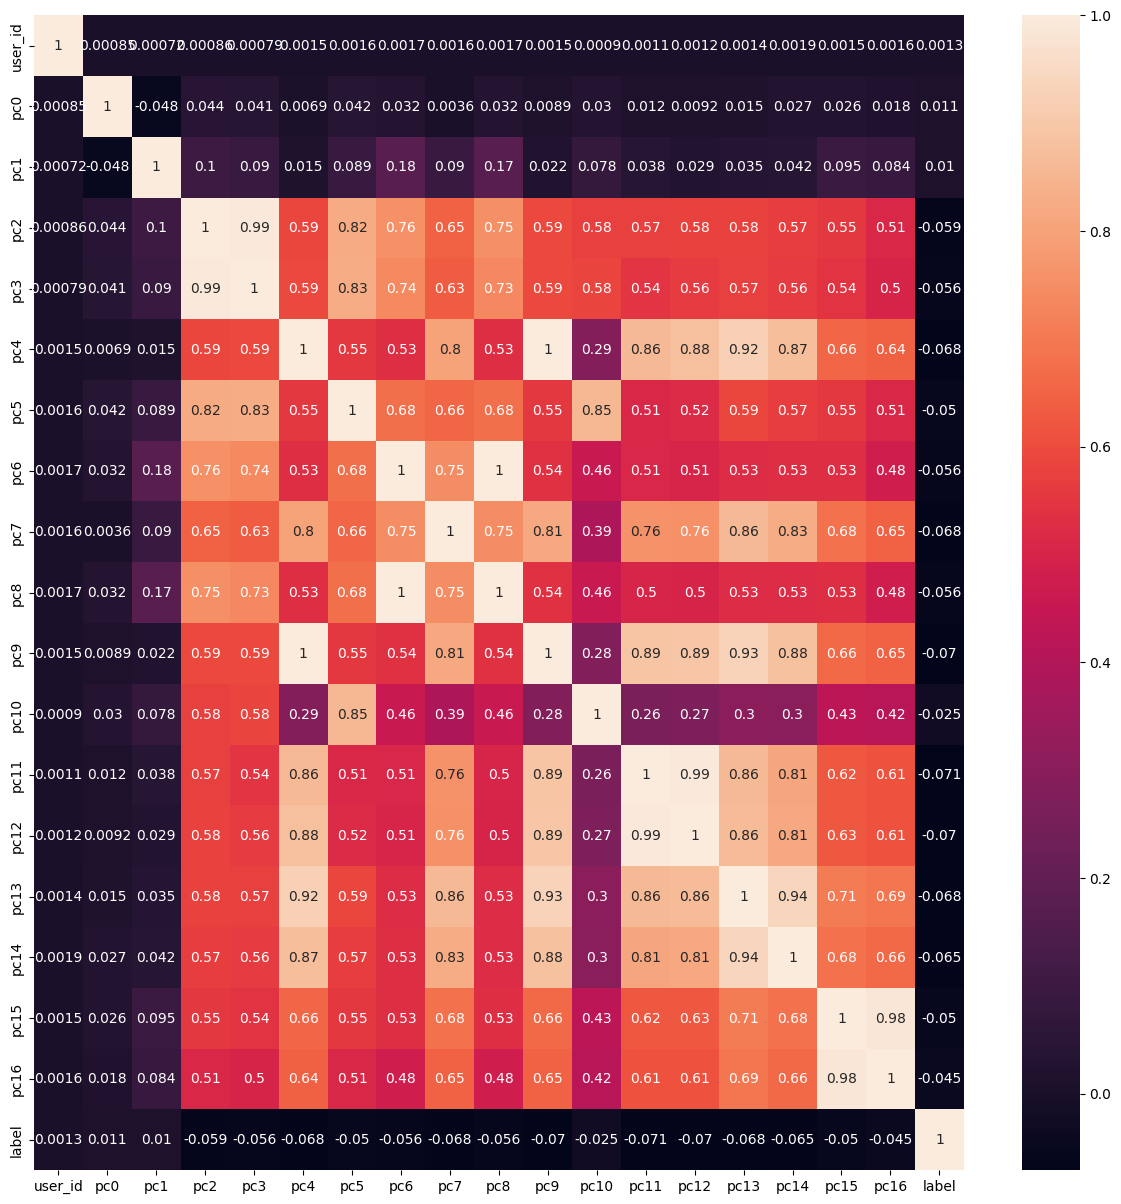

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(userData.corr(), annot=True)
plt.show()

In [6]:
#drop kolom yang sama menurut heatmap
userData = userData.drop('pc8', axis=1) 
userData = userData.drop('pc9', axis=1) 

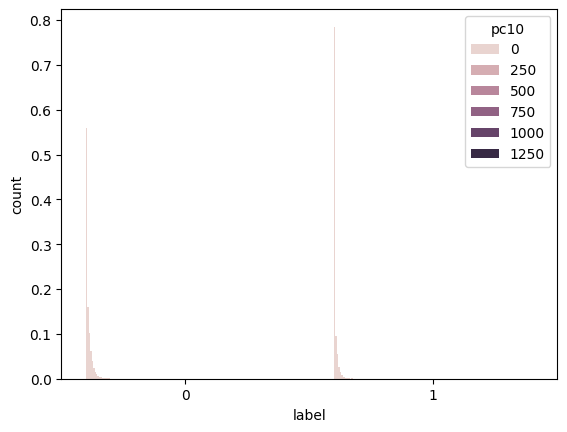

In [7]:
def categoricalAnalysis(attribute) :
    temp = userData.groupby([attribute, "label"]).count()["user_id"].reset_index()
    temp.rename(columns={"user_id" : "count"}, inplace=True)
    temp["count"] = temp.groupby([attribute], group_keys=False).apply(lambda x: x / (x.sum()))["count"]

    sns.barplot(data= temp, x=attribute, hue="label", y= "count")
    plt.show()

def analysisCategorical(attribute) :
    temp = userData.groupby([attribute, "label"]).count()["user_id"].reset_index()
    temp.rename(columns={"user_id" : "count"}, inplace=True)
    temp["count"] = temp.groupby(["label"], group_keys=False).apply(lambda x: x / (x.sum()))["count"]

    sns.barplot(data= temp, x="label", hue=attribute, y= "count")
    plt.show()

attribute = "pc10"
temp = userData.groupby([attribute, "label"]).count()["user_id"].reset_index()
temp.rename(columns={"user_id" : "count"}, inplace=True)
temp["count"] = temp.groupby([attribute], group_keys=False).apply(lambda x: x / (x.sum()))["count"]

analysisCategorical("pc10")

In [8]:
temp = userData["label"].value_counts()
data = pd.DataFrame({'label': temp.index,'values': temp.values})

trace = go.Bar(
    x = data['label'],y = data['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=data['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'label', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)

iplot(fig, filename='class')

In [9]:
label_0 = has_borrowed.loc[has_borrowed['label'] == 0]["ts"]
label_1 = has_borrowed.loc[has_borrowed['label'] == 1]["ts"]

hist_data = [label_0, label_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Loan Time Stamp Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

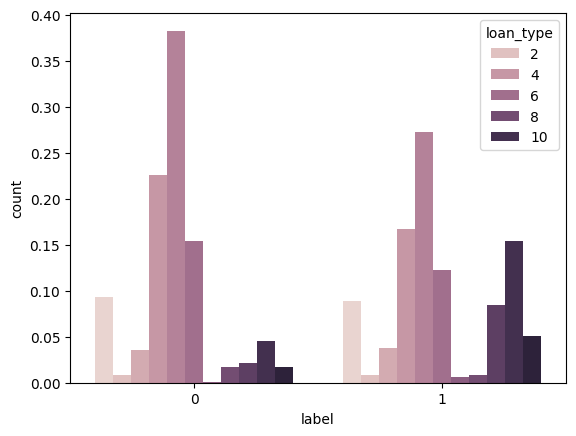

In [10]:
def analysisCategorical(attribute) :
    temp = dataLoan.groupby([attribute, "label"]).count()["user_id"].reset_index()
    temp.rename(columns={"user_id" : "count"}, inplace=True)
    temp["count"] = temp.groupby(["label"], group_keys=False).apply(lambda x: x / (x.sum()))["count"]

    sns.barplot(data= temp, x="label", hue=attribute, y= "count")
    plt.show()

analysisCategorical('loan_type')

In [11]:
tmp = dataLoan[['loan_type','label']].copy()
label_0 = tmp.loc[tmp['label'] == 0]['loan_type']
label_1 = tmp.loc[tmp['label'] == 1]['loan_type']
label_0.describe()

count    1.463095e+06
mean     4.930141e+00
std      2.078485e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      6.000000e+00
max      1.100000e+01
Name: loan_type, dtype: float64

In [12]:
label_1.describe()

count    7995.000000
mean        5.947967
std         2.855856
min         1.000000
25%         4.000000
50%         5.000000
75%         9.000000
max        11.000000
Name: loan_type, dtype: float64

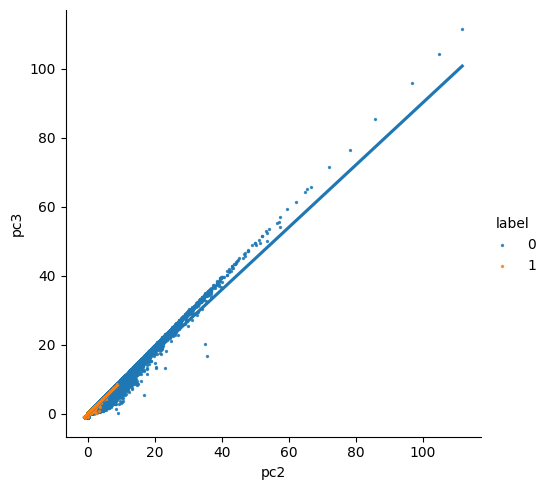

In [13]:
s = sns.lmplot(x='pc2', y='pc3',data=userData, hue='label', fit_reg=True,scatter_kws={'s':2})
plt.show()

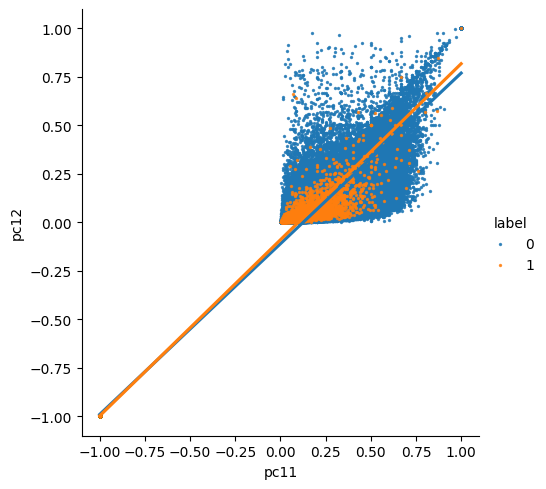

In [14]:
s = sns.lmplot(x='pc11', y='pc12',data=userData, hue='label', fit_reg=True,scatter_kws={'s':2})
plt.show()

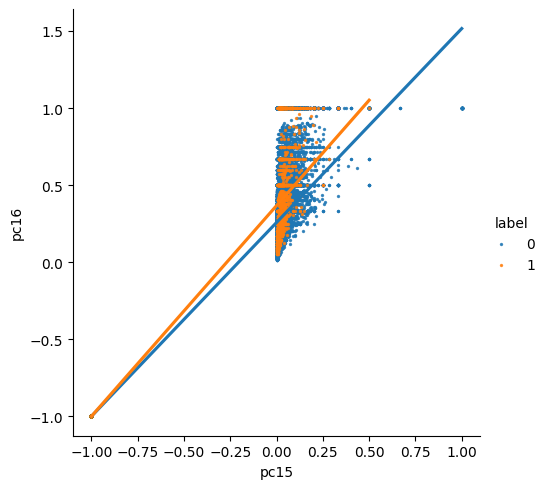

In [15]:
s = sns.lmplot(x='pc15', y='pc16',data=userData, hue='label', fit_reg=True,scatter_kws={'s':2})
plt.show()

C:\Users\Adli\AppData\Local\Temp\ipykernel_20364\1838740921.py:16: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Adli\AppData\Local\Temp\ipykernel_20364\1838740921.py:17: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Adli\AppData\Local\Temp\ipykernel_20364\1838740921.py:16: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Adli\AppData\Local\Temp\ipykernel_20364\1838740921.py:17: UserWarning:



The `bw` parameter i

<Figure size 640x480 with 0 Axes>

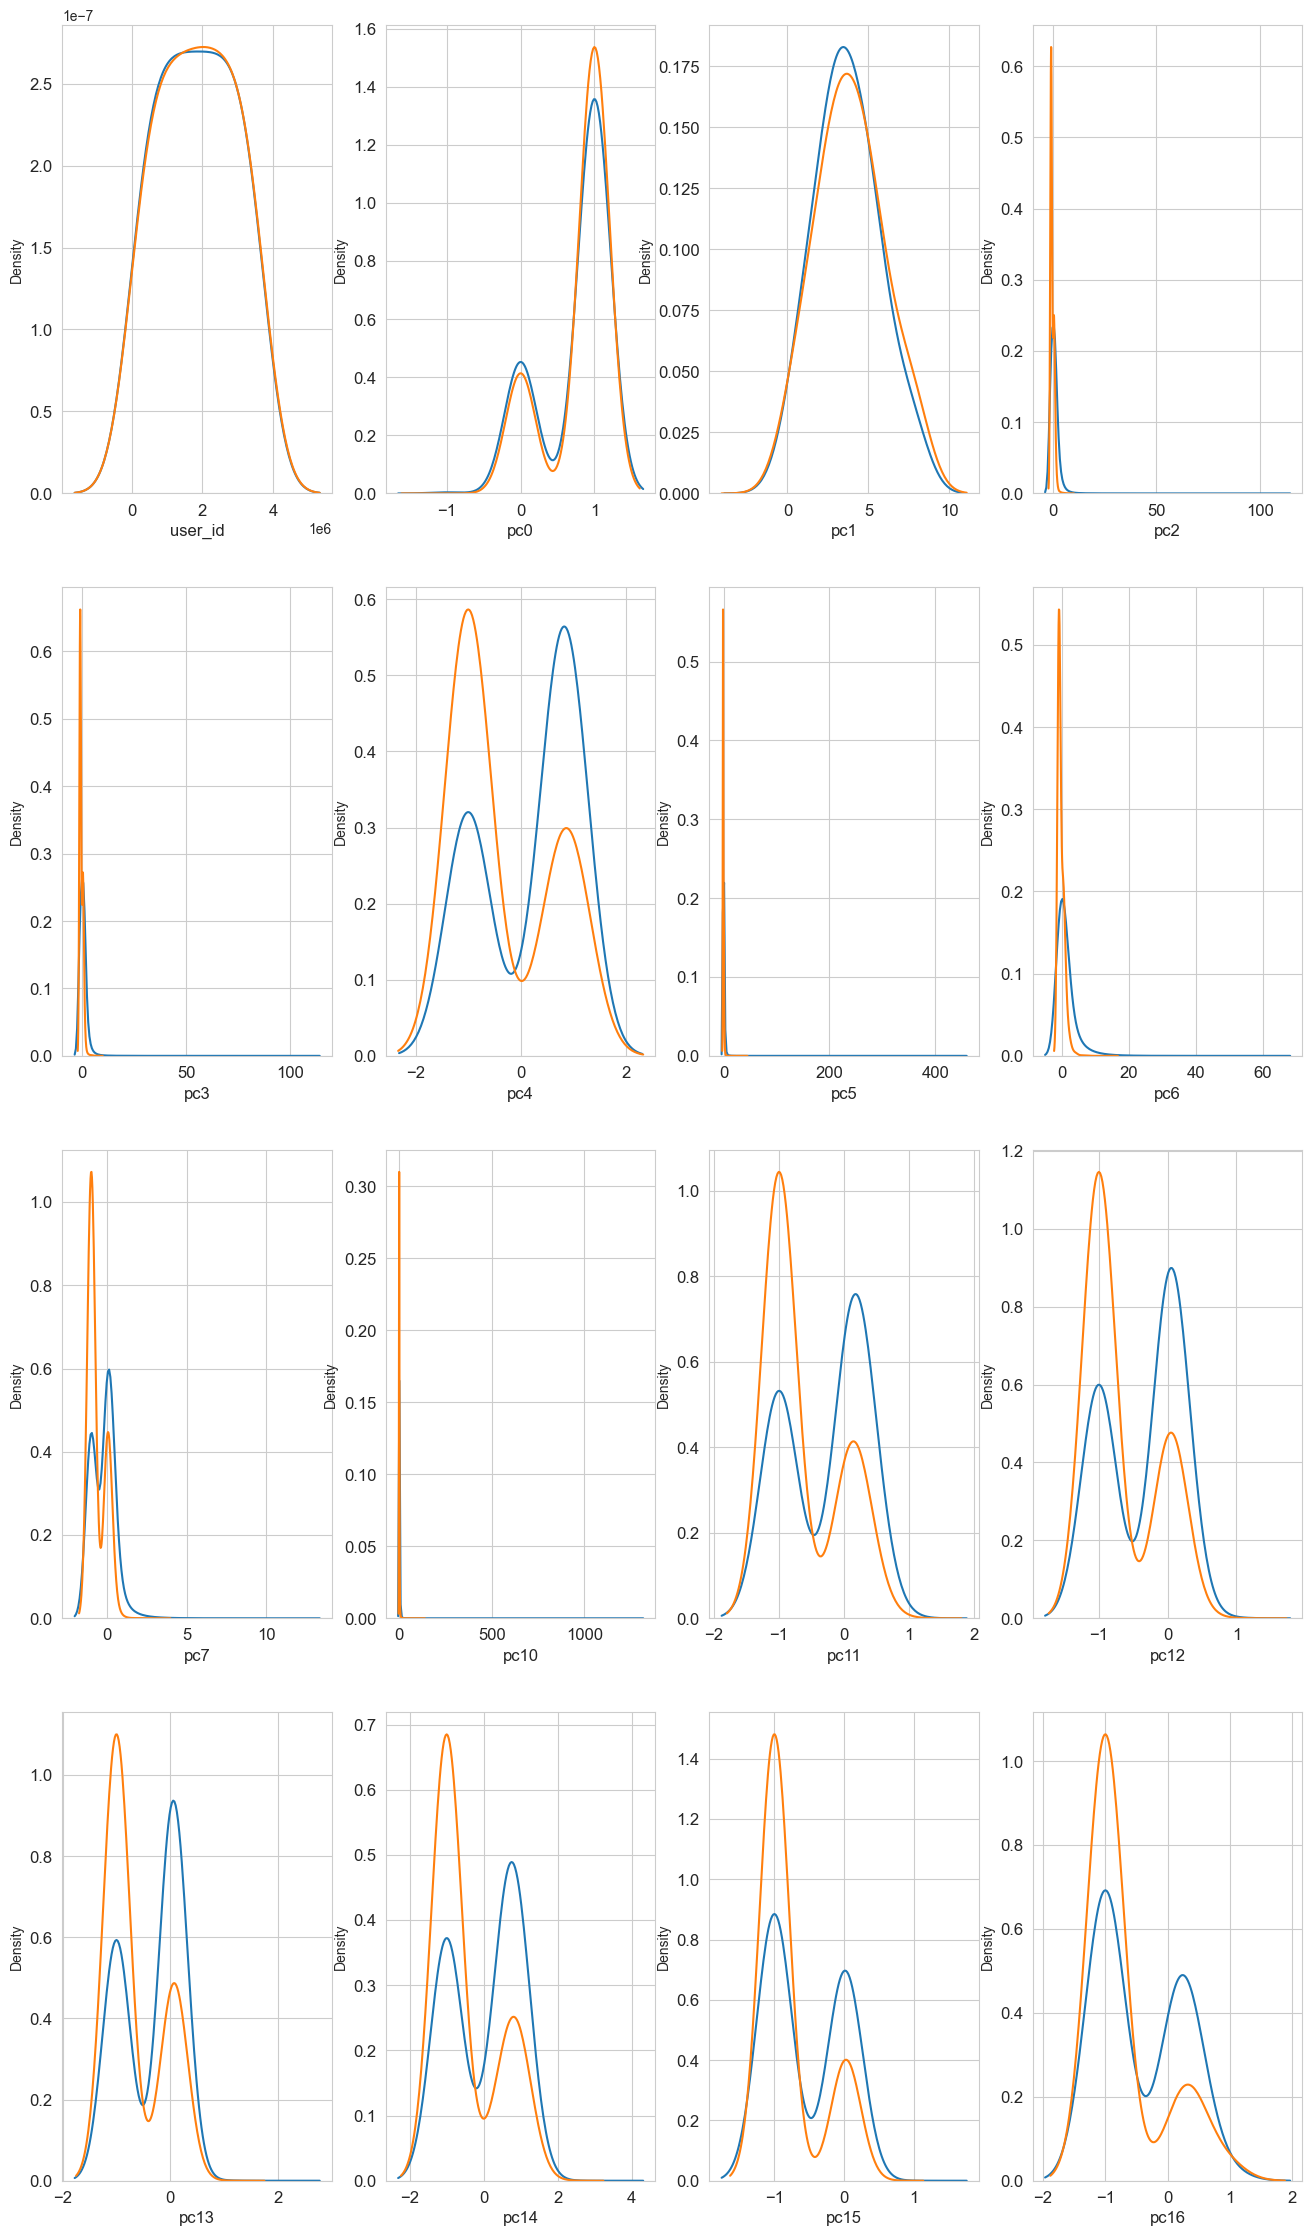

In [16]:
var = userData.columns.values
var = np.delete(var,np.where(var=="label"))


i = 0
t0 = userData.loc[userData['label'] == 0]
t1 = userData.loc[userData['label'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(4,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(4,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="label = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="label = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Feature Engineering

In [17]:
# menambah kolom
userData['-1_count'] = userData.isin([-1]).sum(axis=1) # menghitung berapa banyak missing values (-1)
userData['is_loanreference'] = userData["user_id"].isin(loan["reference_contact"]) # apakah usernya dijadiin loan reference
userData["has_borrowed"] = userData["user_id"].isin(loan["user_id"]) # apakah usernya pernah minjem
loan["referenced_is_non"] = loan["reference_contact"].isin(nonBorrower["user_id"]) # apakah reference nya non borrower
loan["referenced_is_fraud"] = loan["reference_contact"].isin(userData.loc[userData["label"] == 1]["user_id"]) #nambahin kolom apakah reference nya fraud

In [18]:
dataLoan = userData.set_index('user_id').join(loan.set_index('user_id')).reset_index()
dataLoanBaru = userData.set_index('user_id').join(loanBaru.set_index('user_id')).reset_index()

In [19]:
# memisahkan data fraud dan non fraud
loanFraud = dataLoan.loc[dataLoan["label"]==1]
loanFraud = loanFraud[["user_id", "reference_contact", "loan_type", "ts"]]
loanNonFraud = dataLoan.loc[dataLoan["label"]==0]
loanNonFraud = loanNonFraud[["user_id", "reference_contact", "loan_type", "ts"]]

In [20]:
# menambah data frame baru yang berisi info mengenai kontak referensi

referenceInfo = pd.DataFrame()
referenceInfo["user_id"] = pd.concat([userData["user_id"], (nonBorrower["user_id"]),(test["user_id"])])
referenceInfo["referenced_by_fraud"] = referenceInfo["user_id"].isin(loanFraud["reference_contact"])
referenceInfo["referenced_by_non"] = referenceInfo["user_id"].isin(loan.loc[loan.user_id.isin(nonBorrower.user_id)]["reference_contact"])
referenceInfo["referencing_fraud"] = referenceInfo["user_id"].isin(loan.loc[loan["referenced_is_fraud"] == 1]["user_id"])
referenceInfo["referencing_non"] = referenceInfo["user_id"].isin(loan.loc[loan["referenced_is_non"] == 1]["user_id"])
referenceInfo.loc[referenceInfo['user_id'].isin(nonBorrower["user_id"])]['label'] = None

In [21]:
#nyari rata rata ts_std
# meanStdFraud = dataLoanBaru[~dataLoanBaru["ts_std"].isnull() & dataLoanBaru["label"] == 1]["ts_std"].median()
# meanStdNonFraud = dataLoanBaru[~dataLoanBaru["ts_std"].isnull() & dataLoanBaru["label"] == 0]["ts_std"].median()
medianStd = dataLoanBaru[~dataLoanBaru["ts_std"].isnull()]["ts_std"].median()
print(medianStd)

132.93607486307093


In [22]:
# data frame yang akan digunakan untuk modelling

trainLoanReference = dataLoanBaru.set_index('user_id').join(referenceInfo.set_index('user_id')).reset_index() #nyatuin data train sama loan
trainLoanReference.rename(columns={"label_train" : "label"}, inplace=True)
trainLoanReference.columns = trainLoanReference.columns.astype(str)
trainLoanReference.loc[(trainLoanReference["ts_std"].isnull()), "ts_std"] = medianStd
trainLoanReference.fillna(0, inplace=True)


# for i in trainLoanReference.columns:
#     if (trainLoanReference[i].loc[~trainLoanReference[i].isnull()].count()) != 857899:
#         print(i)

In [23]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

droppedLabels = ["label", "user_id"]#, "11", "10", "9", "7", "3", "2", "1", "pc1", "pc5"]
0

X = trainLoanReference.drop(droppedLabels, axis = 1, errors= ['ignore'])
y = trainLoanReference['label']
# X = dataLoan.drop(["user_id", "label", "loan_type",], axis = 1)
# y = dataLoan['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [24]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_jobs= -1, 
                                      random_state=42, 
                                      class_weight="balanced", 
                                      min_samples_leaf=15,
                                      n_estimators=1000)
# Train the model
randomForest.fit(X_train, y_train)

# Predict
# predict = pd.Series(clf.predict(X_test), index = X_test.index)
predictRandomForest = randomForest.predict(X_test)

In [ ]:
average_precision_score(y_test.values, predictRandomForest)

0.027032165640952156

- default = 0.02528770208180763
- min sample leaf 5 = 0.025436238446531808
- min sample leaf 10 = 0.02544918516250045
- min sample leaf 15 = 0.025460922616243723
- IDEAL KAYA HMM = 0.4020140009484878

C:\Users\Adli\AppData\Local\Temp\ipykernel_20364\2248248613.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



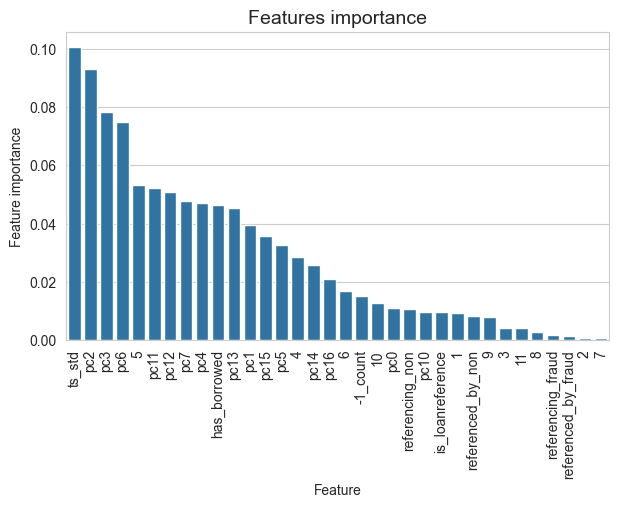

In [26]:
tmp = pd.DataFrame({'Feature': X_train.columns.values, 'Feature importance': randomForest.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

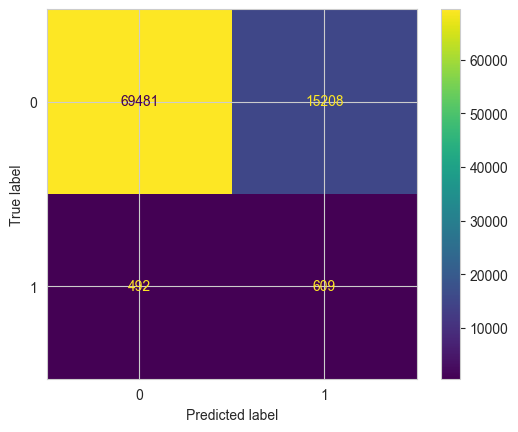

In [27]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictRandomForest)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [28]:
#make a submission
test['-1_count'] = test.isin([-1]).sum(axis=1) # menghitung berapa banyak missing values (-1)
test['is_loanreference'] = test["user_id"].isin(loan["reference_contact"]) # apakah usernya dijadiin loan reference
test["has_borrowed"] = test["user_id"].isin(loan["user_id"]) # apakah usernya pernah minjem
test = test.drop(['pc8','pc9'], axis=1, errors= 'ignore')

testLoan = test.set_index('user_id').join(loanBaru.set_index('user_id')).reset_index()

testLoanReference = testLoan.set_index('user_id').join(referenceInfo.set_index('user_id')).reset_index()
testLoanReference.fillna(0, inplace=True)  
testLoanReference.columns = testLoanReference.columns.astype(str)

In [29]:
testLoanReference.columns

Index(['user_id', 'pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7',
       'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', '-1_count',
       'is_loanreference', 'has_borrowed', 'ts_std', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', 'referenced_by_fraud',
       'referenced_by_non', 'referencing_fraud', 'referencing_non'],
      dtype='object')

In [30]:
trainLoanReference.columns

Index(['user_id', 'pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7',
       'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'label',
       '-1_count', 'is_loanreference', 'has_borrowed', 'ts_std', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', 'referenced_by_fraud',
       'referenced_by_non', 'referencing_fraud', 'referencing_non'],
      dtype='object')

In [31]:
# Train the model
randomForest.fit(X, y)

# Predict
# predict = pd.Series(clf.predict(X_test), index = X_test.index)
predictRandomForest = randomForest.predict(testing)

KeyboardInterrupt: 

In [ ]:
hasil = pd.DataFrame(predictRandomForest, columns=['label'])

In [ ]:
hasil = hasil.merge(userTest, left_index=True, right_index=True)

In [ ]:
hasil = hasil.drop_duplicates(subset=['user_id'], keep='first').reset_index(drop=True)

In [ ]:
order = ['user_id', 'label']
hasil = hasil[order]

In [ ]:
submission['label'] = hasil['label']

In [ ]:
#export to csv
submission.to_csv('submission4.csv', index=False)